<a href="https://colab.research.google.com/github/leonardo-toffalini/szgepes25-hf/blob/main/szgepes_hf_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Feladat

Tegyük fel, hogy egy gyümölcsös meggyfáinak terméshozama normális eloszlású szigma=2 szórással. Eddig (ez a H0) a várható érték (kg-ban) m=10 volt. Egy újfajta permetezőszer gyártója azt állítja, hogy a szer 12kg-ra is fel tudja emelni a várható értéket (H1). Ennek eldöntésére azt a próbát alkalmazzuk, hogy ha n db permetezett fa átlagtermése c kg-ot meghalad, akkor elfogadjuk a gyártó állítását, ha nem, akkor elutasítjuk (tegyük fel a függetlenséget a mintaelemek között). Mekkora legyen n és c, hogy az elsőfajú hiba valószínűsége 0,01, a próba ereje pedig 0,9 legyen? Ábrázoljuk az erőfüggvényt (változtatva a várható termés értékét).
(Tipp: standardizálás)

# Megoldas

----

### Feladat leiras
A feladat szerint eddig 10kg volt a varhato hozam. Azt szeretnenk belatni hogy 12kg varhatoan a hozam az uj szerrel. Tehat a nullhipotezis az eredeti varhatoertek es az ellenhipotezis az igert varhato ertek.

\begin{align}
H_0: \mu &= 10 \\
H_1: \mu &= 12
\end{align}

Ha legalabb $n$ fa atlagtermese tobb mint $c$ kg, akkor utasitjuk el a nullhipotezist.

Celok:
- elsofaju hiba: $\alpha = 0.01$
- erofuggveny: $1 - \beta = 0.9$

----

### Szamitasok

**Elsofaju hiba**

Ha $H_0$ igaz, akkor $\bar{X} \sim N(10, 2/\sqrt{n})$

Akkor vetjuk el a nullhipotezist, ha $\bar{X} > c$. Celunk, hogy $\alpha = P(\bar{X} > c \mid \mu = 10) = 0.01$.

Mivel a standard normalis eloszlasnak a kvantiliseire van tablazatunk, ezert $\bar{X}$-t standardizalni kell. Ehhez ki kell vonni a varhatoerteket es leosztani a szorassal.

Tehat a kovetkezot kell kiszamolnunk:
$$
\alpha = P(Z > (c - 10)/(2/\sqrt{n})) = 0.01
$$

Tehat $(c - 10)/(2/\sqrt{n}) = \Phi(0.99) \approx 2.326$.

Az elozot rendezve $c$-re, a kovetkezot kapjuk:
$$
c = \Phi(0.99) \cdot (2 / \sqrt{n}) + 10
$$

**Erofuggveny**

Ha $H_1$ igaz, akkor $\bar{X} \sim N(12, 2/\sqrt{n})$

Akkor vetjuk el a nullhipotezist, ha $\bar{X} > c$. Celunk, hogy $1 - \beta = P(\bar{X} > c \mid \mu = 12) = 0.9$.

Megint standardizalni kell.

$$
1 - \beta = P(Z > (c - 12)/(2/\sqrt{n})) = 0.9
$$

Tehat $(c - 12)/(2/\sqrt{n}) = \Phi(0.1) \approx -1.282$.

Az elozot rendezve $c$-re, a kovetkezot kapjuk:
$$
c = \Phi(0.1) \cdot (2 / \sqrt{n}) + 12
$$

----

### Valasz
A ket egyenletet osszevetve azt kapjuk, hogy $n \approx 13.02$ es igy $c \approx 11.289$

In [43]:
sigma <- 2
mu0 <- 10
mu1 <- 12
alpha <- 0.01
target_power <- 0.9

In [42]:
# z-values
z_alpha <- qnorm(1 - alpha)  # 2.326
z_beta <- qnorm(target_power)  # 1.282

n_exact <- ((sigma * (z_alpha + z_beta))/(mu1 - mu0))^2
n <- ceiling(n_exact)

c <- mu0 + z_alpha * sigma / sqrt(n)

type1_error <- pnorm(c, mean = mu0, sd = sigma/sqrt(n), lower.tail = FALSE)
actual_power <- pnorm(c, mean = mu1, sd = sigma/sqrt(n), lower.tail = FALSE)

cat("Minta meret (n) =", n, "\n")
cat("Kritikus ertek (c) =", c, "kg\n")
cat("Elsofaju hiba valsege =", type1_error, "\n")
cat("Ero fuggveny =", actual_power, "\n")

Minta meret (n) = 14 
Kritikus ertek (c) = 11.24349 kg
Elsofaju hiba valsege = 0.01 
Ero fuggveny = 0.9215111 


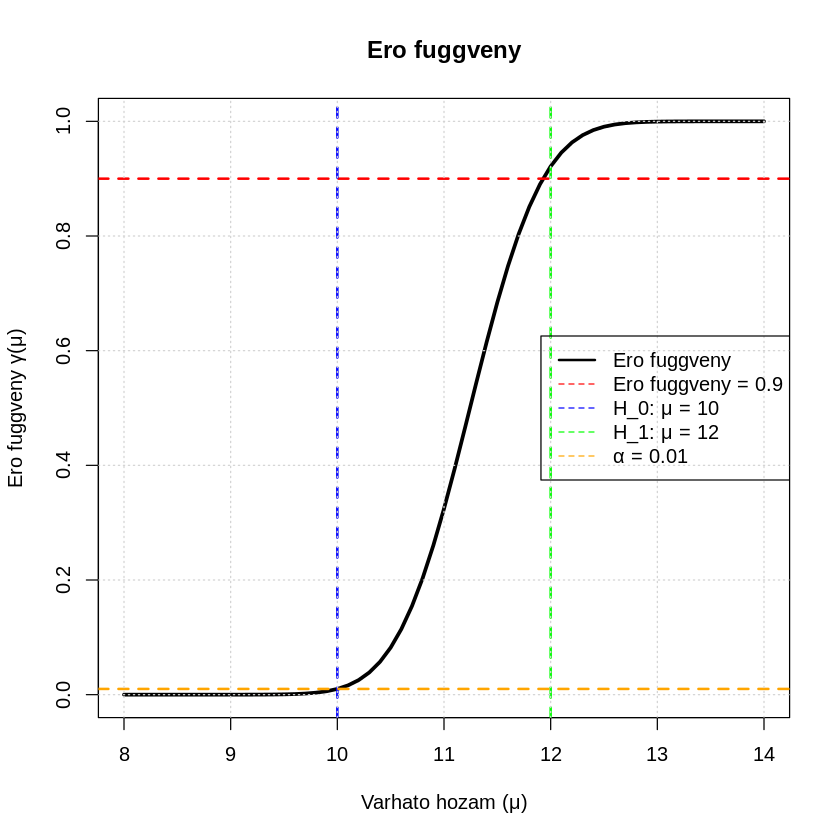

In [41]:
mu_values <- seq(8, 14, 0.1)
power_values <- sapply(mu_values, function(mu) {
  pnorm(c, mean = mu, sd = sigma/sqrt(n), lower.tail = FALSE)
})

plot(mu_values, power_values, type = "l", lwd = 3,
     xlab = "Varhato hozam (μ)", ylab = "Ero fuggveny γ(μ)",
     main = "Ero fuggveny")

abline(h = target_power, col = "red", lty = 2, lwd = 2)
abline(v = mu0, col = "blue", lty = 2, lwd = 2)
abline(v = mu1, col = "green", lty = 2, lwd = 2)
abline(h = alpha, col = "orange", lty = 2, lwd = 2)
grid()
legend("right",
       legend = c("Ero fuggveny", "Ero fuggveny = 0.9", "H_0: μ = 10", "H_1: μ = 12", "α = 0.01"),
       col = c("black", "red", "blue", "green", "orange"),
       lty = c(1, 2, 2, 2, 2),
       lwd = c(2, 1, 1, 1, 1))